In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd

In [2]:
df = pd.read_csv('/content/data.csv', index_col=0)
df['gender'] = df['gender'].apply(lambda x: int(x=='male'))
df.head()

,apple,banana,beef,bread,broccoli,butter,carrot,cheese,chicken,chocolate,...,parsley,pasta,peas,potato,rice,spinach,tomato,age,gender,label
0,0,0,0,2,0,1,0,1,3,0,...,1,0,0,0,0,0,0,24,1,104
1,0,0,0,2,0,1,0,1,3,0,...,1,0,0,0,0,0,0,24,1,104
2,0,0,0,2,0,0,0,2,2,0,...,0,0,0,0,0,0,0,24,1,105
3,0,0,0,1,0,1,0,2,2,0,...,1,0,0,0,0,0,0,24,1,115
4,0,0,0,1,0,1,0,2,2,0,...,1,0,0,0,0,0,0,24,1,115


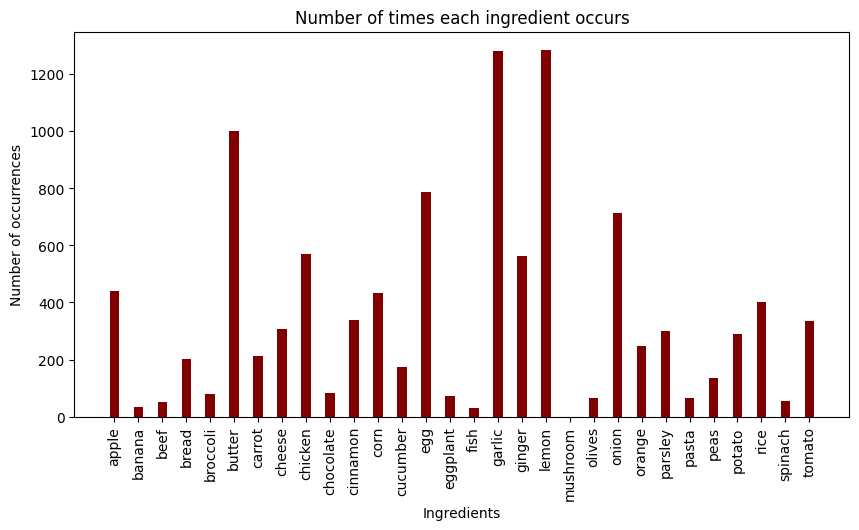

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# calculate the number of times each ingredient occurred
cols = df.columns[:-3]
data = dict(df[cols].sum(0))

ingredients = list(data.keys())
number_of_images = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(ingredients, number_of_images, color ='maroon',
        width = 0.4)

# Rotation of the bars names
plt.xticks(range(len(ingredients)), ingredients, rotation='vertical')

plt.xlabel("Ingredients")
plt.ylabel("Number of occurrences")
plt.title("Number of times each ingredient occurs")
plt.show()

In [ ]:
features = df.copy()
labels = features.pop('label') - 102

In [ ]:
model = tf.keras.Sequential([
    layers.Dense(32, input_shape=(32,), activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1000, activation='softmax')
])

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("/content/cps/save_at_{epoch}.keras"),
]
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    features, labels,
    epochs=200,
    batch_size=2,
    callbacks=callbacks
)

Epoch 1/200
116/116 [==============================] - 2s 6ms/step - loss: 6.5012 - accuracy: 0.0519
Epoch 2/200
116/116 [==============================] - 1s 7ms/step - loss: 4.8165 - accuracy: 0.0736
Epoch 3/200
116/116 [==============================] - 1s 6ms/step - loss: 4.2332 - accuracy: 0.0866
Epoch 4/200
116/116 [==============================] - 1s 6ms/step - loss: 3.8965 - accuracy: 0.0823
Epoch 5/200
116/116 [==============================] - 1s 7ms/step - loss: 3.7055 - accuracy: 0.0952
Epoch 6/200
116/116 [==============================] - 1s 9ms/step - loss: 3.5328 - accuracy: 0.1169
Epoch 7/200
116/116 [==============================] - 1s 8ms/step - loss: 3.4260 - accuracy: 0.1299
Epoch 8/200
116/116 [==============================] - 1s 8ms/step - loss: 3.3067 - accuracy: 0.0996
Epoch 9/200
116/116 [==============================] - 2s 15ms/step - loss: 3.2486 - accuracy: 0.1039
Epoch 10/200
116/116 [==============================] - 1s 10ms/step - loss: 3.1407 - accu

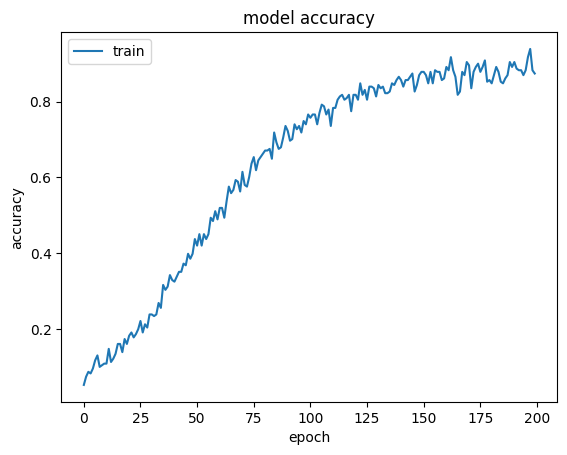

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()